This Jupyter Notebook is designed to help access to netCDF files created by AMOF (https://amof.ac.uk/) instrumentation. With this notebook you will be able to:
    1. Open a netCDF file
    2. Inspect the contents
    3. Extract a selected variable and save it to a Microsoft Excel (.xlsx) file
    4. Select and apply the AMOF QC flags that are defined in the AMOF data standard
    5. Plot and variables and save images.

This tool is is part of a suit of tools being developed by the NCAS (https://www.ncas.ac.uk/en/) Data Project (https://sites.google.com/ncas.ac.uk/ncasobservations/home) and full supporting documentation for each data product can be obtained from the site (eventually the link to the docs will go here).

Created by: Barbara Brooks 
Contact: barbara.brooks@ncas.ac.uk
Version: 1
Date: September 2020

Usage:
Section 1: Opening a file & Check file is legitimate
Section 2: Inspect the Global Attributes
Section 3. Inspect the Dimensions defined in the file
Section 4. Inspect the Variables in the files
Section 5. Select and inspect a variable
Section 6. Save the selected variable to file
Section 7. Visualise selected variable
           7A: Selected variable name and units
           7B: Load the selected variable data
           7C: Load the dependent variable data
           7D: Select a specific qc_flag
           7E: Apply qc_flag
           7F: Toggle axes (log10\linear) and log10 data
           7G: Plot 1D data
           7H: Plot 2D data
           7I: Plot 3D data

Note Sections 6 and 7 require section 5 to have been executed.

In [73]:
# Section 1: Opening a file & Check file is legitimate
#
# The first thing we need to do is provide the full path and name of the file we want to open.
#
# We then need to check that this is a netCDF file and can be opened

from netCDF4 import Dataset
import numpy as np
import warnings
warnings.filterwarnings("ignore") #stop warning being printed

# input 
fn = str(input("Enter full path to target file:")) 
  
try:
    # open the file
    ncid = Dataset(fn, mode='r')
    
    # close again if no error
    ncid.close()
    
    #output
    print(fn, 'can be opened for reading.')
except:
    #output
    print('Error: ',fn, 'cannot be opened for reading.')

Enter full path to target file:C:\Users\lecbjb\Desktop\ncas-ceilometer-2_wao_201712_aerosol-backscatter_standard_v2.0.nc
C:\Users\lecbjb\Desktop\ncas-ceilometer-2_wao_201712_aerosol-backscatter_standard_v2.0.nc can be opened for reading.


In [ ]:
# Section 2: Inspect the Global Attributes
#
# Files produced by our instrumentation have an extensive set tof file attributes that will provide you with 
# information about the deployment, the calibration of the instrument, the history of the data in the file, 
# and additional information the file provider considered migh be useful.

try:
    #open the source file
    ncid = Dataset(fn, mode='r')
    
    #get the list of global attributes
    nc_attrs = ncid.ncattrs()   
    try:
        for nc_attr in nc_attrs:
            message = "{}: {}".format(nc_attr, ncid.getncattr(nc_attr))
            #output
            print(message)
    except:
        pass
    
    #close the source file
    ncid.close()
except:
    #output
    print('Error: ',fn, ' cannot be opened for reading.')

In [ ]:
# Section 3: Inspect the Dimensions defined in the file
#
# All variables in a file have dimensions. 
#
# For AMOF data there will always be a time dimension.
#
# This section will list what dimensions are used in the file

try:
    #open the source file
    ncid = Dataset(fn, mode='r')
    
    # get the list of dimensions
    nc_dims = [dim for dim in ncid.dimensions]
    try:
        for dim in nc_dims:
            message = "Name: {}  Size: {}".format(dim, len(ncid.dimensions[dim]))
            #output
            print(message)
    except:
        pass  
    
    #close the source file
    ncid.close()    
except:
    #output
    print('Error: ',fn, ' cannot be opened for reading.')

In [74]:
# Section 4: Inspect the Variables in the files
#
# This section will list all the varables that are in the file

try:
    #open the source file
    ncid = Dataset(fn, mode='r')
    
    # get the list of variables
    nc_vars = [var for var in ncid.variables]     
    try:
        for var in nc_vars:
            #output
            print(var)
    except:
        pass
    
    #close the source file
    ncid.close()
except:
    #output
    print('Error: ',fn, ' cannot be opened for reading.')    

time
latitude
longitude
day_of_year
year
month
day
hour
minute
second
altitude
attenuated_aerosol_backscatter_coefficient
laser_pulse_energy
laser_temperature
sensor_zenith_angle
profile_scaling
window_contamination
background_light
backscatter_sum
qc_flag


In [75]:
# Section 5. Select and inspect a varible
#
# This section will allow you to select a variable and inspect its attributes. 

# input 
selected_variable = str(input("Enter a variable name: ")) 

try:
    #open the source file
    ncid = Dataset(fn, mode='r')
    
    # Variable name attributes
    message = "Name: {}".format(selected_variable)      
    #output
    print(message)
    
    #Variable dimensions
    message = "Dimensions:  {}".format(ncid.variables[selected_variable].dimensions)      
    #output
    print(message)
    
    # Variable datatype
    message = "Type: {}".format(ncid.variables[selected_variable].dtype) 
    #output
    print(message)  
    
    # print all the variable attributes
    for ncattr in ncid.variables[selected_variable].ncattrs():
        message = "{}: {}".format(ncattr, ncid.variables[selected_variable].getncattr(ncattr))
        #output
        print(message)
    
    #close the source file
    ncid.close()
except:
    #output
    print('Error: ',fn, ' cannot be opened for reading.')  

Enter a variable name: attenuated_aerosol_backscatter_coefficient
Name: attenuated_aerosol_backscatter_coefficient
Dimensions:  ('time', 'altitude')
Type: float32
_FillValue: -1.0000000200408773e+20
units: m-1 sr-1
long_name: Attenuated Aerosol Backscatter Coefficient
valid_min: 2.0000000233721948e-07
valid_max: 0.006553499959409237
cell_methods: time: mean
coordinates: latitude longitude


In [ ]:
# Section 6. Save the selected variable to to file
#
# This section will save the selected vaiable and assicated dependent data to Microsoft Excel workbook.
#
# The work book has 4 worksheets:
#    1. Global Attributes
#
#    2. Varaiable Attributes
#        Dependent Variable
#        Selected Variable
#
#    3. Dependent Variable Data
#
#    4. Selected Variable Data

import xlsxwriter

# input 
fo = str(input("Enter full path and name of the output file: ")) 

try:
    #create workbook
    workbook = xlsxwriter.Workbook(fo, {'nan_inf_to_errors': True})
   
    #create worksheets
    GA = workbook.add_worksheet('Global Attributes')
    VA = workbook.add_worksheet('Variable Attributes')
    VD = workbook.add_worksheet('Dependent Variable Data')
    VV = workbook.add_worksheet('Variable Data')

    #open the nc file
    ncid = Dataset(fn, mode='r') #open the source file
    
    #Stop NetCDF package using the valid min and max to mask the data 
    ncid.set_auto_maskandscale(False)
    
    # get the global attributes
    nc_attrs = ncid.ncattrs()
      
    # get the dimensions
    nc_dims = [dim for dim in ncid.dimensions]
      
    # Dimensions of selected variable
    dd = ncid.variables[selected_variable].dimensions 
      
    #create listof dimension names for variable
    xyz = []
    for n in range(len(dd)):
        for dim in nc_dims:
            if dim in dd[n]:
                xyz.append(dim)               
        
    # Global Attribute
    # zero column and row pointers
    row = 0
    col = 0
    for nc_attr in nc_attrs:
        GA.write(row, col, nc_attr)
        try:
            GA.write(row, col + 1, ncid.getncattr(nc_attr))
        except:
            pass
        row += 1
      
    # Variable Attributs
    # zero column and row pointers
    row = -1
    col = 0
    #Dimensional variables
    for n in range(len(xyz)):
        row += 1
        
        #Dimensional Variable name
        VA.write(row, col, "{}".format(xyz[n]))
              
        row += 1
        
        #Dimansional Variable dimensions
        VA.write(row, col+1, "Dimensions")
        try:
            VA.write(row, col+2, "{}".format(ncid.variables[xyz[n]].dimensions))
        except:
            pass
         
        row += 1
         
        #Diamension Variable datatype
        VA.write(row, col+1, "Type")
        try:
            VA.write(row, col+2, "{}".format(ncid.variables[xyz[n]].dtype))
        except:
            pass
         
        row += 1
         
        #Diemsional Variable datatype
        VA.write(row, col+1, "Shape")
        try:
            VA.write(row, col+2, "{}".format(ncid.variables[xyz[n]].shape))
        except:
            pass
         
        # Dimensional Variable attribute
        try:   
            for ncattr in ncid.variables[xyz[n]].ncattrs():
                row +=1
                VA.write(row, col+1, "{}".format(ncattr))
                VA.write(row, col+2, "{}".format(ncid.variables[xyz[n]].getncattr(ncattr)))
        except:
            pass
      
    #Selected variable  
    row += 1
    #Selected Variable name
    VA.write(row, col, "{}".format(selected_variable))
 
    row += 1
    #Selected Variable dimensions
    VA.write(row, col+1, "Dimensions")
    VA.write(row, col+2, "{}".format(ncid.variables[selected_variable].dimensions))
      
    row += 1
    #Selected Variable datatype
    VA.write(row, col+1, "Type")
    VA.write(row, col+2, "{}".format(ncid.variables[selected_variable].dtype))
      
    row += 1
    #Selected Variable datatype
    VA.write(row, col+1, "Shape")
    VA.write(row, col+2, "{}".format(ncid.variables[selected_variable].shape))
    
    for ncattr in ncid.variables[selected_variable].ncattrs():
        row +=1
        VA.write(row, col+1, "{}".format(ncattr))
        VA.write(row, col+2, "{}".format(ncid.variables[selected_variable].getncattr(ncattr)))  
      
    # Data
    # zero column and row pointers
    row = 0
    col = -1
    #Dimensional variable 
    for n in range(len(xyz)):
        col += 1
        row = 0
        # Variable name as column title on row 0
        VD.write(row, col, "{}".format(xyz[n]))
        try:# add data row by row in same coumn
            dd = np.array(ncid.variables[xyz[n]][:])
        except:
            dd = np.arange(len(ncid.dimensions[xyz[n]]))
        for m in range(len(dd)):
            row += 1
            VD.write(row, col, dd[m])
      
    # selected variable name an column title
    VV.write(0, 0, "{}".format(selected_variable))
    if len(xyz) == 1:
        #1D
        row = 0
        col = 0
        dd = np.array(ncid.variables[selected_variable][:])
        for m in range(len(dd)):
            row += 1
            VV.write(row, col, dd[m])
    if len(xyz) == 2:
        #2D
        row = 0
        dd = np.array(ncid.variables[selected_variable][:][:])      
        xx = dd.shape
        for m in range(xx[0]):
            col = -1
            row += 1
            for mn in range(xx[1]):
                col += 1
                VV.write(row, col, dd[m,mn])
    if len(xyz) == 3:
        #3D
        row = 1
        dd = np.array(ncid.variables[selected_variable][:][:][:])      
        xx = dd.shape
        for ij in range(xx[2]):#blocks
            col = 0
            VV.write(row, col, ij)  
            for m in range(xx[0]):#rows
                col = 0
                row += 1
                for mn in range(xx[1]):#cols
                    col += 1
                    VV.write(row, col, dd[m,mn,ij])
            row += 2
           
    # close nc file
    ncid.close()
      
    # close workbook   
    workbook.close()
    
    # output
    print(selected_variable,' saved to ', fo)
except:
    # output
    print('Unable to save ', selected_variable,' to ', fo)

In [76]:
# Section 7. Visualise selected variable
#
# The following sections allow you to visualise the selected variable.
#
# Section 7A: Selected variable name and units 

try:
    #open the source file
    ncid = Dataset(fn, mode='r')
    
    #get dimensions of selected variable
    nc_dims = ncid.variables[selected_variable].dimensions
    
    # get data long name, units attributes and if present the practicle units
    try:
        dd_label = "{} ({})".format(ncid.variables[selected_variable].getncattr('long_name'),ncid.variables[selected_variable].getncattr('practical_units'))
    except:   
        dd_label = "{} ({})".format(ncid.variables[selected_variable].getncattr('long_name'),ncid.variables[selected_variable].getncattr('units'))
    
    # close nc file
    ncid.close()
    
    # output
    print("Plot label: ",dd_label)
except:
    # output
    print("Error extracting selected varibale attributes")

Plot label:  Attenuated Aerosol Backscatter Coefficient (m-1 sr-1)


In [77]:
# Section 7B: Load the selected variable data. 
#
# AMOF data is either 1, 2 or 3D and can be extracted from a file with or without a basic QC applied. 
#
# This most basic QC sees values outside the deifeined valid_min or valid_max automatically set to nan on loading.

#input
qc_apply = str(input("Apply basic QC? (y or n)"))

try:
    #open the source file
    ncid = Dataset(fn, mode='r')
    
    if qc_apply.lower() == 'n':
        # Stop NetCDF package using the valid min and max to mask the data
        # this data has no QC
        ncid.set_auto_maskandscale(False)
        
        # output
        print("No basic QC applied")
    else:
        # NetCDF package uses the valid min and max to mask the data
        # this data has QC
        ncid.set_auto_maskandscale(True)
        
        # output
        print("Basic QC applied")
    
    if len(nc_dims) == 1:
        dd = ncid.variables[selected_variable][:]

    if len(nc_dims) == 2:
        dd = ncid.variables[selected_variable][:][:]
    
    if len(nc_dims) == 3:
        dd = ncid.variables[selected_variable][:][:][:]
        
    # close nc file
    ncid.close()   
    
    # output
    print("Selected data loaded")
except:
    # output
    print("Error extracting selected varibale data")               

Apply basic QC? (y or n)y
Basic QC applied
Selected data loaded


In [78]:
# Section 7C: Load the dependent variable data
#
# All AMOF data is always a function of time and is used as the x axis variable when plotting
#
# If the data is 2D the second dependent varaible is loaded and used as the y axis variable when plotting
#
# If the data is 3D the third dependent varaible is loaded. This is termned the z axis.

import matplotlib.dates as mdates
import time
try:
    #open the source file
    ncid = Dataset(fn, mode='r')
    
    x_label = "Time (UTC)"
    t_file = ncid.variables['time'][:]
    v_min = ncid.variables['time'].getncattr('valid_min')
    v_max = ncid.variables['time'].getncattr('valid_max')
    x = []
    # The time in the files is epoch and needs to be converted to something that matplotlib understands
    for n in range(len(t_file)):
        x.append(mdates.datestr2num(time.asctime(time.gmtime(t_file[n]))))
        # set the limits  
        x_min = mdates.datestr2num(time.asctime(time.gmtime(v_min)))
        x_max = mdates.datestr2num(time.asctime(time.gmtime(v_max)))
        
    # close nc file
    ncid.close()
    
    # output
    print(x_label, "Data loaded")
except:
    # output
    print("Error extracting time data")  

# if selected variable is dependent on more than time    
if len(nc_dims) > 1:
    try: 
        #open the source file
        ncid = Dataset(fn, mode='r')

        y_label = "{} ({})".format(ncid.variables[nc_dims[1]].getncattr('long_name'),ncid.variables[nc_dims[1]].getncattr('units'))   
        y = ncid.variables[nc_dims[1]][:]
        y_min = ncid.variables[nc_dims[1]].getncattr('valid_min')
        y_max = ncid.variables[nc_dims[1]].getncattr('valid_max')   
        
        # close nc file
        ncid.close()
        
    except:
        y_label = "{} ({})".format(nc_dims[1], "unitless")
        y = np.arange(len(ncid.dimensions[nc_dims[1]]))  
        y_min = np_min(y)  
        y_max = np_max(y)  
        
    # output
    print(y_label, "Data loaded")  
                     
    if len(nc_dims) == 3:    
        try: 
            #open the source file
            ncid = Dataset(fn, mode='r')
        
            z_label = "{} ({})".format(ncid.variables[nc_dims[2]].getncattr('long_name'),ncid.variables[nc_dims[2]].getncattr('units'))   
            z = ncid.variables[nc_dims[2]][:]
            z_min = ncid.variables[nc_dims[2]].getncattr('valid_min')
            z_max = ncid.variables[nc_dims[2]].getncattr('valid_max')
                           
            # close nc file
            ncid.close()
        except:
            z_label = "{} ({})".format(nc_dims[2], "unitless")
            z = np.arange(len(ncid.dimensions[nc_dims[1]]))  
            z_min = np.min(z)  
            z_max = np.max(z)   

        # output
        print(z_label, "Data loaded")

Time (UTC) Data loaded
Geometric height above geoid (WGS84). (m) Data loaded


In [ ]:
# Section 7D: Select a specific qc_flag
#
# The data of the selected variable at this point is either raw or has had basic QC applied. 

# More advanced quality control of the data can be achieved by applying a qc_flag. 

# All AMOF files have at least one qc_flag and the following selection can be used to select and apply one. 

# input 
qc_flag = str(input("Enter name of qc_flag to be applied: ")) 

try:
    #open the source file
    ncid = Dataset(fn, mode='r')
    
    #Stop NetCDF package using the valid min and max to mask the data 
    ncid.set_auto_maskandscale(False)
    
    #get dimensions of selected variable
    qc_dims = ncid.variables[qc_flag].dimensions
    
    if len(qc_dims) == 1:
        qc_mask = ncid.variables[qc_flag][:]

    if len(qc_dims) == 2:
        qc_mask = ncid.variables[qc_flag][:][:]
    
    if len(qc_dims) == 3:
        qc_mask = ncid.variables[qc_flag][:][:][:]
    
    flag_val = ncid.variables[qc_flag].getncattr('flag_values')
    flag_men = ncid.variables[qc_flag].getncattr('flag_meanings')
        
    # close nc file
    ncid.close()  
    
    #output
    print("Flag values (b indicated a byte)", flag_val)
    print("Corresponding flag meaning: ", flag_men)
except:
    # output
    print("Error extracting qc_flag data")

In [ ]:
# Section 7E: Apply qc_flag
#
# The flag value is a byte with values in the range 0 - 255. 
# 
# 0 is never used
# 
# 1 always indicates good data 
#
# Any other value has the a meaning as shown
#
# Input the flag value to be applied (emit the b). 
#
# If a value greater than 1 is seleceted all data with corresponding flag values not equl to this will be masked as a NaN.

# input 
qc_val = int(input("Enter flag value to be applied: ")) 

try:
    if qc_mask.shape == dd.shape:     
        np.putmask(dd, (qc_mask != qc_val), np.nan)
        dd_min = np.nanmin(dd)
        dd_max = np.nanmax(dd)
except:
    # output 
    print("Flag mask: ", qc_flag, " not the same shape as the data") 

In [79]:
# Section 7F: Toggle axes (log10\linear) and log10 data
#
# The data can be logged before plotting, and the x and y axes can be toggled between log and linear.
#
# This section allows the user to toggle between these options.

# input
log = str(input("log data (y or n)?"))

if log.lower() == 'y':
    # output
    print("Log10 applied to data")
    
    dd_p = np.log10(dd) # nans returned for data <=0
    dd_min_p = np.nanmin(dd_p)
    dd_max_p = np.nanmax(dd_p)
    dd_label_p = "log10({})".format(dd_label)
else:
    # output
    print("Log10 not applied to data")
    
    dd_p = dd # nans returned for data <=0
    dd_min_p = dd_min
    dd_max_p = dd_max
    dd_label_p = "{}".format(dd_label)

# input 
xaxis_log = str(input("x-axis log or normal?(log or linear): ")) 
  
# output 
print("You entered: ", xaxis_log) 

# input 
yaxis_log = str(input("y-axis log or normal?(log or linear): ")) 
  
# output 
print("You entered: ", yaxis_log)    

log data (y or n)?y
Log10 applied to data
x-axis log or normal?(log or linear): linear
You entered:  linear
y-axis log or normal?(log or linear): linear
You entered:  linear


In [ ]:
# Section 7G: Plot 1D data
#
# Run the next section if the data is 1D

if len(nc_dims) == 1:
    import matplotlib.pyplot as plt
    
    try:
        #open the source file
        ncid = Dataset(fn, mode='r')
    
        # Plot title
        ti = "{}".format(ncid.variables[selected_variable].getncattr('long_name'))
   
        #close the source file
        ncid.close()
    except:
        # output
        print("Error making plot title")
    
    fig = plt.figure(figsize = (5, 4), dpi = 100)
    
    ax = fig.add_subplot(111, ylabel = dd_label_p, xlabel = x_label, title = ti)
    ax.plot(x, dd_p)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(dd_min_p, dd_max_p)
    if "log" in xaxis_log.lower():
        ax.set_xscale('log')
    else:
        ax.set_xscale('linear')
    if "log" in yaxis_log.lower():
        ax.set_yscale('log')
    else:
        ax.set_yscale('linear') 
    ax.grid(True)
    
    #autoformat time axis 
    locator = mdates.AutoDateLocator(minticks=3, maxticks=12)
    formatter = mdates.ConciseDateFormatter(locator)
    if x_label == "Time (UTC)":
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
    else:
        ax.yaxis.set_major_locator(locator)
        ax.yaxis.set_major_formatter(formatter) 

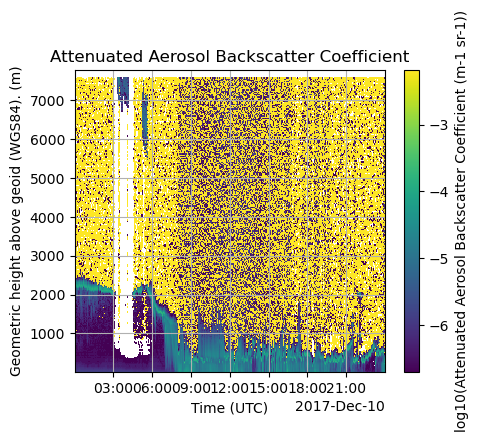

In [80]:
# Section 7H: Plot 2D data
#
# Run the next section if the data is 2D

if len(nc_dims) == 2:
    import matplotlib.pyplot as plt
    
    try:
        #open the source file
        ncid = Dataset(fn, mode='r')
    
        # Plot title
        ti = "{}".format(ncid.variables[selected_variable].getncattr('long_name'))
   
        #close the source file
        ncid.close()
    except:
        # output
        print("Error making plot title")
    
    fig = plt.figure(figsize = (5, 4), dpi = 100)
    
    if len(x) == dd_p.shape[0]:
        temp = dd_p
        dd_p = np.transpose(temp)
    
    ax = fig.add_subplot(111, ylabel = y_label, xlabel = x_label, title = ti)
    pc = ax.pcolor(x, y, dd_p, cmap='viridis', vmin = dd_min_p, vmax = dd_max_p)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    if "log" in xaxis_log.lower():
        ax.set_xscale('log')
    else:
        ax.set_xscale('linear')
    if "log" in yaxis_log.lower():
        ax.set_yscale('log')
    else:
        ax.set_yscale('linear')  
    ax.grid(True)
    cb = fig.colorbar(pc, ax = ax, orientation = 'vertical')  
    cb.set_label(dd_label_p)    
    
    #autoformat time axis 
    locator = mdates.AutoDateLocator(minticks=3, maxticks=12)
    formatter = mdates.ConciseDateFormatter(locator)
    if x_label == "Time (UTC)":
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
    else:
        ax.yaxis.set_major_locator(locator)
        ax.yaxis.set_major_formatter(formatter) 

In [81]:
# Section 7I: Plot 3D data
#
# Run the next section if the data is 3D

# Visualising data that has 3 dependent variables is non-trivial. 
#
# In this instance a 2D surface is extracted form the data for plotting. 
#
# The user has to select which slice to plot and this is done by defining and index in the range 
# of the length of the thrid dependent variable.

if len(nc_dims) == 3:
    import matplotlib.pyplot as plt
    
    # input
    message = "Entre a value in the range {} to {}".format(zmin, z_max)
    z_val = int(input(message))

    # flatten to 2D
    temp = dd_p
    dd_p = np.reshape(temp[:,:,z_val], (temp.shape[0], temp.shape[1]))
    dd_min_p = np.nanmin(dd_p)
    dd_max_p = np.nanmax(dd_p)

    try:
        #open the source file
        ncid = Dataset(fn, mode='r')
    
        # Plot title
        ti = "{}".format(ncid.variables[selected_variable].getncattr('long_name'))
   
        #close the source file
        ncid.close()
    except:
        # output
        print("Error making plot title")
    
    fig = plt.figure(figsize = (5, 4), dpi = 100)
    
    if len(x) == dd_p.shape[0]:
        temp = dd_p
        dd_p = np.transpose(temp)
      
    ax = fig.add_subplot(111, ylabel = y_label, xlabel = x_label, title = ti)
    pc = ax.pcolor(x, y, dd_p, cmap='viridis', vmin = dd_min_p, vmax = dd_max_p)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    if "log" in xaxis_log.lower():
        ax.set_xscale('log')
    else:
        ax.set_xscale('normal')
    if "log" in yaxis_log.lower():
        ax.set_yscale('log')
    else:
        ax.set_yscale('normal')  
    ax.grid(True)
    cb = fig.colorbar(pc, ax = ax, orientation = 'vertical')  
    cb.set_label(dd_label)    
    
    #autoformat time axis 
    locator = mdates.AutoDateLocator(minticks=3, maxticks=12)
    formatter = mdates.ConciseDateFormatter(locator)
    if x_label == "Time (UTC)":
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
    else:
        ax.yaxis.set_major_locator(locator)
        ax.yaxis.set_major_formatter(formatter) 

SyntaxError: EOL while scanning string literal (<ipython-input-81-9dce6b8a4441>, line 8)